# Übung 1

In dieser Übung beschäftigen Sie sich mit dem kNN Verfahren und mit der Machine-Learning Bibliothek <a href="https://scikit-learn.org/stable/">sklearn</a>. 

Die Datensätze werden im weiteren Verlauf der Vorlesung häufig als <a href="https://numpy.org/">Numpy</a>-Arrays oder als <a href="https://pandas.pydata.org/">pandas</a>-Dataframes eingelesen und verarbeitet. Eine gute Einführung in diese beiden Bibliotheken bietet das Buch <a href="https://ebookcentral.proquest.com/lib/othaw/detail.action?docID=5572584">Datenanalyse mit Python</a>, das inzwischen aus dem Hochschulnetz kostenlos als E-Book verfügbar ist.

Zuerst werden ein paar Module importiert:

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#### Einlesen des Datensatzes

In den ersten beiden Aufgaben soll mit dem Iris-Datensatz gearbeitet werden, der als Beispieldatensatz in sklearn enthalten ist und den wir nun laden:

In [3]:
iris = datasets.load_iris()

Datensatzbeschreibung:

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Wir speichern die Features in der Variable X und die Labels in der (Ziel-)Variable y. Die Schreibweise (großes "X" und kleines "y") ist gängige Konvention im Supervised Learning. 

In [5]:
X = iris.data
y = iris.target

`X` und `y` sind nun Numpy-Arrays:

In [6]:
type(X)

numpy.ndarray

In [7]:
type(y)

numpy.ndarray

Das Array `X`  enthält 4 Features (sepal length, sepal width, petal length, petal width) und 150 Samples:

In [8]:
X.shape

(150, 4)

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Das Array `y` enthält die Labels, d.h., um welche Schwertlilienart es sich bei dem entsprechenden Sample jeweils handelt (0=setosa, 1=versicolor, 2=virginica):

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Jede der drei Klassen kommt genau 50-Mal vor:

In [11]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

#### Visualisierung

Wenn Sie die folgende Zelle ausführen, werden verschiedene Scatter-Plots gezeichnet, die einen ersten visuellen Eindruck vom Datensatz ermöglichen:

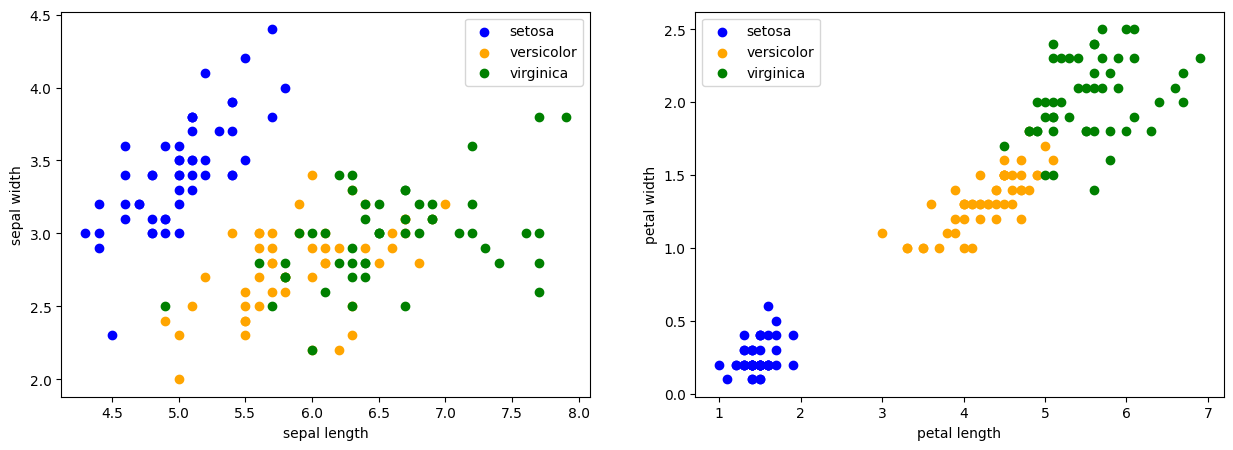

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(X[y==0,0], X[y==0,1], c='blue')
ax1.scatter(X[y==1,0], X[y==1,1], c='orange')
ax1.scatter(X[y==2,0], X[y==2,1], c='green')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax1.legend(['setosa','versicolor','virginica'])

ax2.scatter(X[y==0,2], X[y==0,3], c='blue')
ax2.scatter(X[y==1,2], X[y==1,3], c='orange')
ax2.scatter(X[y==2,2], X[y==2,3], c='green')
ax2.set_xlabel('petal length')
ax2.set_ylabel('petal width')
ax2.legend(['setosa','versicolor','virginica'])

#### Train-Test-Split

Zur Vorbereitung der Modellbildung wird der Datensatz in zwei Teile gesplittet. Ein Teil der Daten wird zum Modelltraining verwendet, der andere Teil für das spätere Testen beiseite gelegt. Dies leistet die Methode `train_test_split` aus dem Modul `sklearn.model_selection`. Das Splitten erfolgt "zufällig", d.h. bei jeder Ausführung erhält man ggf. ein anderes Ergebnis. Möchte man für Testzwecke immer denselben Split haben, kann man das Argument `random_state` setzen (das hilft auch, um Ihre Ergebnisse mit denen Ihrer Kommilitonen vergleichen zu können):

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

### Aufgabe 1: KNN-Implementierung

In dieser Aufgabe soll das KNN-Verfahren schrittweise "from scratch" implementiert werden. Ziel ist es, einerseits Ihr Verständnis für die Methode zu vertiefen und andererseits den Umgang mit Python, insbesondere mit NumPy Arrays, zu üben.

#### a) Euklidische Distanz

Schreiben Sie eine Funktion namens **dist**, die die Euklidische Distanz zwischen zwei Punkten P1 und P2 (gegeben als eindimensionale Numpy-Arrays) berechnet. Verwenden Sie dazu entweder eine for-Schleife über die Einträge von P1 und P2 oder eine geeignete *list comprehension*. Überprüfen Sie zunächst mittels **assert**, dass P1 und P2 gleich viele Einträge haben.

In [14]:
import math
def dist(P1, P2):
    """
    Parameters:
        P1, P2 (numpy array): points of dimension (dim,) to calculate distance

    Returns:
        Euclidean distance of P1, P2

    """
    assert len(P1)== len(P2)
    distance_sum = 0
    for p in range(len(P1)):
        res = math.pow(P1[p]-P2[p], 2)
        distance_sum += res
    return math.sqrt(distance_sum)
        


Sie können wie folgt die Methode testen, um die euklidische Distanz zwischen den beiden ersten in X_train enthaltenen Objekten zu bestimmen:

In [15]:
X_train[0]

array([5.4, 3. , 4.5, 1.5])

In [16]:
len(X_train[0])

4

In [17]:
dist(X_train[0], X_train[1])

1.5

#### b) Bestimmung der nächsten Nachbarn

Schreiben Sie eine Funktion namens `get_neighbors`, welche in einem Datensatz X die `n_neighbors` nächsten Nachbarn eines gegebenen Punktes `Q` findet und deren Indizes zurückgibt. <br>Tipp: Berechnen Sie die Distanzen zu allen Punkten in `X`, sortieren Sie diese absteigend und geben Sie die ersten n_neighbors Einträge zurück. Die Methode `np.argsort` kann dabei nützlich sein.

In [18]:
def get_neighbors(Q, X, n_neighbors):
    """
    Computes the n_neighbors nearest neighbors of query point Q in X
    
    Parameters:
        Q (flat numpy array): query point 
        X (numpy array): data set of shape (n_samples, n_features)
        n_neighbors (int): number of neighbors to search for

    Returns:
        idx_neighbors (flat numpy array): array containing the row indices of the 
        n_neighbors nearest neighbors of Q in X

    """
    distances = np.array([])
    for point in X:
        if (point != Q).all():
            distance = dist(Q, point)
            idx = point
            distances = np.append(distances, distance)
    
    sorted_dist = np.argsort(distances)
    
    neighbors = []
    for n in range(n_neighbors):
        neighbors.append(sorted_dist[n])
        
    return neighbors

In [19]:
get_neighbors(X_train[0], X_train, 2)

[35, 46]

In [20]:
X_train

array([[5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3. , 5. , 1.7],
       [4.9, 3.1, 1.5, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [6.9, 3.2, 5.7, 2.3],
       [6. , 2.7, 5.1, 1.6],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6. , 2.2, 5. , 1.5],
       [7.2, 3.2, 6. , 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [4.4, 3. , 1.3, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [6.3, 3.4, 5.6, 2.4],
       [4.6, 3.4, 1.4, 0.3],
       [6.8, 3. , 5.5, 2.1],
       [6.3, 3.3, 6. , 2.5],
       [4.7, 3.2, 1.3, 0.2],
       [6.1, 2

#### c) Klassifikation des Testdatensatzes

In [21]:
y_train

array([1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0,
       0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 1, 2])

Vervollständigen Sie dazu die funktion `predict`, die für jedes Sample eines gegebenen Datensatzes `X_test` (dabei repräsentiert jede Zeile von `X_test` ein zu klassifizierendes Sample) eine Nearest Neighbor-Klassifizierung durchführt. Ermitteln Sie dazu unter Verwendung der Funktion `get_neighbors` für jedes Sample jeweils die `n_neighbors` nächsten Nachbarn im Trainingsdatensatz `X_train` und ordnen Sie diesem die dort mehrheitlich vertretene Klasse zu. 

In [22]:
def predict(X_train, y_train, X_test, n_neighbors):
    """
    Predicts the class of all objects in X_test using k-NN 
    
    Parameters:
        X_train (numpy array): training samples of shape [n_samples, n_features]
        y_train (flat numpy array): training labels corresponding to the samples in X_train
        X_test (numpy array): test samples of shape [n_query, n_features]
        n_neighbors (int): number of neighbors so search for

    Returns:
        y_hat: flat numpy array containing the predicted labels corresponding to the samples in X_test

    """
    classified = []
    for point in range(len(X_test)):
            classes = np.array([])
            neighbors = get_neighbors(X_train[point], X_train, n_neighbors)
            for neighbor in neighbors:
                classes = np.append(classes,y_train[neighbor])

            unique, counts = np.unique(classes, return_counts=True)

            class_dict = dict(zip(unique, counts))

            temp = min(class_dict.values())
            res = [key for key in class_dict if class_dict[key] == temp]
            res = int(res[0])
            classified.append([X_test[point], res])
    return classified

Anwendung der Methode auf den Iris-Testdatensatz:

In [23]:
y_hat = predict(X_train, y_train, X_test, 3)
y_hat

[[array([6.1, 2.8, 4.7, 1.2]), 0],
 [array([5.7, 3.8, 1.7, 0.3]), 1],
 [array([7.7, 2.6, 6.9, 2.3]), 0],
 [array([6. , 2.9, 4.5, 1.5]), 2],
 [array([6.8, 2.8, 4.8, 1.4]), 1],
 [array([5.4, 3.4, 1.5, 0.4]), 0],
 [array([5.6, 2.9, 3.6, 1.3]), 0],
 [array([6.9, 3.1, 5.1, 2.3]), 1],
 [array([6.2, 2.2, 4.5, 1.5]), 0],
 [array([5.8, 2.7, 3.9, 1.2]), 1],
 [array([6.5, 3.2, 5.1, 2. ]), 2],
 [array([4.8, 3. , 1.4, 0.1]), 2],
 [array([5.5, 3.5, 1.3, 0.2]), 1],
 [array([4.9, 3.1, 1.5, 0.1]), 0],
 [array([5.1, 3.8, 1.5, 0.3]), 2],
 [array([6.3, 3.3, 4.7, 1.6]), 1],
 [array([6.5, 3. , 5.8, 2.2]), 2],
 [array([5.6, 2.5, 3.9, 1.1]), 0],
 [array([5.7, 2.8, 4.5, 1.3]), 2],
 [array([6.4, 2.8, 5.6, 2.2]), 2],
 [array([4.7, 3.2, 1.6, 0.2]), 0],
 [array([6.1, 3. , 4.9, 1.8]), 1],
 [array([5. , 3.4, 1.6, 0.4]), 2],
 [array([6.4, 2.8, 5.6, 2.1]), 1],
 [array([7.9, 3.8, 6.4, 2. ]), 2],
 [array([6.7, 3. , 5.2, 2.3]), 1],
 [array([6.7, 2.5, 5.8, 1.8]), 0],
 [array([6.8, 3.2, 5.9, 2.3]), 2],
 [array([4.8, 3. , 1

In [24]:
labeled = []
for x in range(len(X_train)):
    labeled.append([X_test[x], y_test[x]])

In [25]:
error_count = 0
for x in range(len(labeled)):
    if labeled[x][1] != y_hat[x][1]:
        error_count += 1

error_count

48

#### d) Modellbewertung

Bewerten Sie die Güte des Modells, indem Sie den Anteil der falsch klassifizierten Objekte des Testdatensatzes berechnen. 

Miserabel

### Aufgabe 2: KNN mit Scikit Learn

Wiederholen Sie Aufgabe 1 unter Verwendung der Klasse KNeighborsClassifier der Bibliothek sklearn. 
Eine Dokumentation der Klasse finden Sie <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">hier</a>.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
test_result = neigh.predict(X_test)

In [27]:
test_result

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1])

In [28]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1])

In [29]:
y_test == test_result

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [30]:
error_count = 0
for x in range(len(y_test)):
    if y_test[x] != test_result[x]:
        error_count += 1

error_count

2

### Aufgabe 3: KNN mit Scikit Learn für den Wine-Datensatz

Die sklearn-Schnittstelle funktioniert nicht nur mit NumPy-Objekten, sondern auch mit Pandas-DataFrames, wie wir in dieser Aufgabe demonstrieren wollen. Dazu laden wir aus einer CSV-Datei den Wine-Datensatz. Dieser enthält verschiedene Features für Weine, die man zur Vorhersage der Rebsorte verwenden soll.

Einlesen des Datensatzes

In [31]:
df = pd.read_csv('wine.csv')

In [32]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [33]:
df['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

Betrachtung der ersten 10 Einträge mit der Methoden `head`:

In [34]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Die Zielvariable ist die erste Spalte. Diese speichern wir in der Variable y:

In [35]:
y = df['Wine']

y ist nun eine pandas Series:

In [36]:
type(y)

pandas.core.series.Series

Die Labels sind wie folgt verteilt:

In [37]:
y.value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Wine, dtype: float64

Die Features (ohne die Spalte 'Wine'!) werden in der Variable `X` gespeichert:

In [38]:
X = df.drop('Wine', axis=1)

Mit der Methode `head` kann man wieder die ersten 10 Zeilen ausgeben lassen:

In [39]:
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


X ist ein pandas DataFrame:

In [40]:
type(X)

pandas.core.frame.DataFrame

a) Führen Sie einen Train-Test-Split durch. Verwenden Sie 60% der Daten für das Modelltraining und den Rest für die Modellbewertung.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [42]:
X_test

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
32,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


b) Trainieren Sie ein KNN-Modell in `scikit-learn` mit dem Parameter `n_neighbors=3`.

In [43]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
test_result = neigh.predict(X_test)

In [44]:
test_result

array([3, 1, 3, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       3, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 3,
       3, 1, 3, 2, 2, 1, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1,
       1, 3, 3, 1, 1, 2], dtype=int64)

c) Berechnen Sie den Anteil der Objekte in X_test, die durch das Modell korrekt klassifiziert werden.

In [45]:
y_test.to_numpy()

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1,
       1, 3, 1, 1, 2, 3], dtype=int64)

In [46]:
err = pd.Series(y_test == test_result)
err.value_counts(normalize= True)

True     0.666667
False    0.333333
Name: Wine, dtype: float64

d) Wiederholen Sie Teilaufgabe b) mit `n_neighbors=4` und vergleichen Sie die Ergebnisse.

In [47]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
test_result = neigh.predict(X_test)

In [48]:
err = pd.Series(y_test == test_result)
err.value_counts(normalize= True)

True     0.694444
False    0.305556
Name: Wine, dtype: float64

e) Betrachten Sie erneut den Datensatz X. Was fällt auf? Durch welche Maßnahme könnte das Modell verbessert werden und warum?

In [49]:
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Manche Features sind nicht passend skaliert (Proline)